In [1]:
import pandas as pd
import numpy as np

import random

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100
sns.set_style('whitegrid')

In [5]:
#!pip install pandas-datareader

In [6]:
from pandas_datareader import data as wb

In [7]:
Pg = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

In [8]:
Pg.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.215732
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.149876
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,8.034625
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,8.051086
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,8.018162


In [9]:
Pg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6504 entries, 1995-01-03 to 2020-10-29
Data columns (total 6 columns):
High         6504 non-null float64
Low          6504 non-null float64
Open         6504 non-null float64
Close        6504 non-null float64
Volume       6504 non-null float64
Adj Close    6504 non-null float64
dtypes: float64(6)
memory usage: 355.7 KB


In [10]:
Pg.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-23,142.880005,141.759995,141.759995,142.380005,4278100.0,142.380005
2020-10-26,142.050003,140.009995,141.500000,141.300003,5315500.0,141.300003
2020-10-27,143.339996,141.649994,141.940002,142.360001,6806700.0,142.360001
2020-10-28,140.940002,137.309998,140.449997,137.660004,8192200.0,137.660004
2020-10-29,139.089996,135.800003,137.350006,137.570007,5475200.0,137.570007


To create a dataframe for other companies using their stock industry tickers. We only want the Adj Close for all of them.
We want for companies, Proctor & Gamble, MicroSoft, AT & T, Ford and General Electric.

In [11]:
tickers = ['PG', 'MSFT', 'T', 'F', 'GE']

df = pd.DataFrame()

for t in tickers:
    df[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [12]:
df.head()

,PG,MSFT,T,F,GE
Date,,,,,
1995-01-03,8.215732,2.401030,5.528146,4.242091,4.062095
1995-01-04,8.149876,2.418484,5.551041,4.356228,4.062095
1995-01-05,8.034625,2.378592,5.637778,4.318182,4.072051
1995-01-06,8.051086,2.418484,5.637778,4.318182,4.052139
1995-01-09,8.018162,2.403525,5.620430,4.394274,4.012317


In [13]:
df.tail()

,PG,MSFT,T,F,GE
Date,,,,,
2020-10-23,142.380005,216.229996,27.820000,8.16,7.63
2020-10-26,141.300003,210.080002,27.379999,8.03,7.38
2020-10-27,142.360001,213.250000,26.920000,7.92,7.10
2020-10-28,137.660004,202.679993,26.500000,7.70,7.42
2020-10-29,137.570007,204.720001,26.760000,7.90,7.37


To upload data from IEX web site. This site provide does not provide data 5 years prio the date you excecude code.

In [14]:
#pip install iexfinance

In [15]:
# Pg_iex = wb.DataReader('PG', data_source='iex', start='2018-01-01')

In [16]:
#tickers = ['PG', 'MSFT', 'T', 'F', 'GE']

#df = pd.DataFrame()

#for t in tickers:
    #df[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

# Calculating a Portfolio of Securities Rate of returns

In [27]:
df = df.drop('T', axis=1)

In [28]:
df.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.215732,2.401030,4.242091,4.062095
1995-01-04,8.149876,2.418484,4.356228,4.062095
1995-01-05,8.034625,2.378592,4.318182,4.072051
1995-01-06,8.051086,2.418484,4.318182,4.052139
1995-01-09,8.018162,2.403525,4.394274,4.012317


In [29]:
df.tail()

,PG,MSFT,F,GE
Date,,,,
2020-10-23,142.380005,216.229996,8.16,7.63
2020-10-26,141.300003,210.080002,8.03,7.38
2020-10-27,142.360001,213.250000,7.92,7.10
2020-10-28,137.660004,202.679993,7.70,7.42
2020-10-29,137.570007,204.720001,7.90,7.37


1. Normalise data to 100: this is to treat all the values as if they were starting from 100(x-axis).

In [30]:
df.iloc[0]

PG      8.215732
MSFT    2.401030
F       4.242091
GE      4.062095
Name: 1995-01-03 00:00:00, dtype: float64

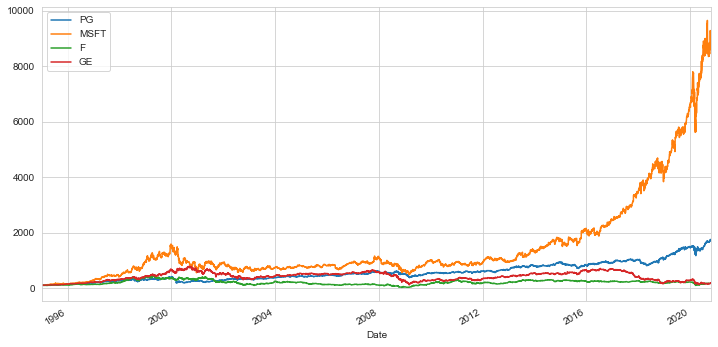

In [31]:
((df / df.iloc[0]) * 100).plot(figsize=(12,6))
plt.show()

Plotting the data without multiplying by 100, will give a inconclusive plot as to which company performed better during the course of time, upto this moment.

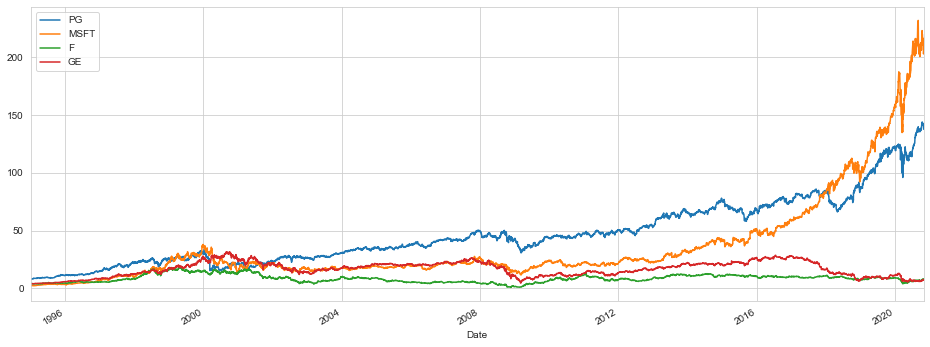

In [32]:
df.plot(figsize=(16,6))
plt.show()

From our plot we see that Mircosoft is a winner. From 2009, PG has performed better than T, F and GE.

2. Calculate the Simple Return for these Stocks.

In [33]:
returns = (df / df.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004089,-0.006186,0.017621,-0.009827


Create a Weight array for all 4 stocks. The weight of all stocks must sum up to 1, therefore we going to apply a 0.25 for each stock. We are walking with a single portfolio.

In [34]:
weight = np.array([0.25, 0.25, 0.25, 0.25])

Calculate the product of the weight of each stock by its return using the np.dot() function, it allows us to calculate vector or matrix products straight away.

In [35]:
np.dot(returns, weight)

array([        nan,  0.00653982, -0.00922977, ..., -0.00726194,
       -0.01632213,  0.00716173])

This is not what we want, instead we multiplied EACH Return for a Stock. We suppose to multiply by the avarge of Returns for each stock. So going to multiply it by the number of trading days in a year = 250

In [36]:
annual_returns = returns.mean() * 250 # Is the number of trading days in a year.
annual_returns

PG      0.134051
MSFT    0.221064
F       0.103557
GE      0.074035
dtype: float64

In [37]:
np.dot(annual_returns, weight)

0.1331768274825479

In [38]:
portfolio_1 = str(round(np.dot(annual_returns, weight), 5) * 100) + '%'
print(portfolio_1)

13.318%


In [39]:
weight_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [40]:
portfolio_2 = str(round(np.dot(annual_returns, weight_2), 5) * 100) + '%'
print(portfolio_1)
print(portfolio_2)

13.318%
16.128%


# Calculating the Indices Rate of Return

In [41]:
#pip install Yahoo-ticker-downloader

In [42]:
#pip install get-all-tickers

In [44]:
tickers_ind = ['^GSPC', '^IXIC', '^GDAXI']

df_ind = pd.DataFrame()

for t in tickers_ind:
    df_ind[t] = wb.DataReader(t, data_source='yahoo', start='1997-1-1')['Adj Close']

In [45]:
df_ind.head() 

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,737.010010,1280.699951,2820.810059
1997-01-03,748.030029,1310.680054,2863.260010
1997-01-06,747.650024,1316.400024,2890.199951
1997-01-07,753.229980,1327.729980,2876.340088
1997-01-08,748.409973,1320.349976,2904.080078


In [46]:
df_ind.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2020-10-23,3465.389893,11548.280273,12645.750000
2020-10-26,3400.969971,11358.940430,12177.179688
2020-10-27,3390.679932,11431.349609,12063.570312
2020-10-28,3271.030029,11004.870117,11560.509766
2020-10-29,3310.110107,11185.589844,11598.070312


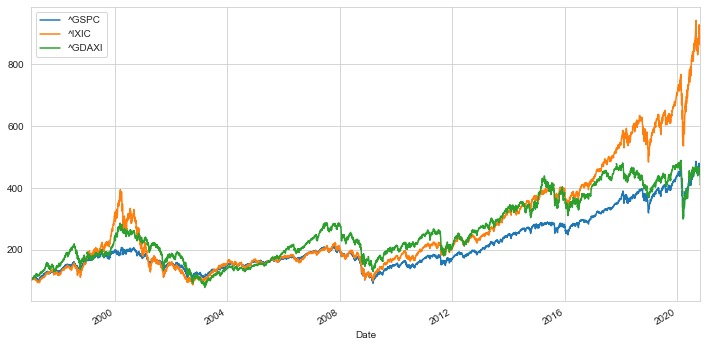

In [47]:
((df_ind / df_ind.iloc[0]) * 100).plot(figsize=(12,6))
plt.show()

In [48]:
returns_ind = (df_ind / df_ind.shift(1)) - 1
returns_ind.head()
returns_ind.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2020-10-23,0.003446,0.003674,0.008187
2020-10-26,-0.018590,-0.016396,-0.037054
2020-10-27,-0.003026,0.006375,-0.009330
2020-10-28,-0.035288,-0.037308,-0.041701
2020-10-29,0.011947,0.016422,0.003249


In [49]:
annual_returns_ind = returns_ind.mean() * 250
annual_returns_ind

^GSPC     0.082118
^IXIC     0.122226
^GDAXI    0.072336
dtype: float64

In [50]:
weight_ind_2 = np.array([0.3, 0.4, 0.3])

In [51]:
weight_ind_3 = np.array([0.35, 0.30, 0.35])

In [52]:
portfolio_ind_1 = str(round(np.dot(annual_returns_ind, weight_ind_2), 5) * 100) + '%'
print(portfolio_ind_1)

9.523%


In [53]:
portfolio_ind_2 = str(round(np.dot(annual_returns_ind, weight_ind_3), 5) * 100) + '%'
print(portfolio_ind_2)

9.073%


# Calculating Security's Risk

In [54]:
tickers_sec = ['PG', 'BEI.DE']

df_sec = pd.DataFrame()

for t in tickers_sec:
    df_sec[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [55]:
df_sec.head()

,PG,BEI.DE
Date,,
2007-01-03,42.636059,39.576427
2007-01-04,42.312363,39.836281
2007-01-05,41.949009,39.017349
2007-01-08,42.041492,39.025219
2007-01-09,41.935799,38.143303


In [56]:
df_sec.tail()

,PG,BEI.DE
Date,,
2020-10-23,142.380005,99.320000
2020-10-26,141.300003,99.900002
2020-10-27,142.360001,100.099998
2020-10-28,137.660004,93.599998
2020-10-29,137.570007,90.660004


We will take the Logarithmic Return because we will examine each company separatly in the given time.

In [57]:
Log_returns = np.log(df_sec / df_sec.shift(1))

In [58]:
Log_returns.head()

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006544
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002202,0.000202
2007-01-09,-0.002517,-0.022858


In [59]:
Log_returns.tail()

,PG,BEI.DE
Date,,
2020-10-23,0.006553,0.008087
2020-10-26,-0.007614,0.005823
2020-10-27,0.007474,0.002000
2020-10-28,-0.033572,-0.067139
2020-10-29,-0.000654,-0.031914


For PG:

In [60]:
Log_returns['PG'].mean()

0.0003365218573966493

In [61]:
Log_returns['PG'].mean() * 250

0.08413046434916233

In [62]:
Log_returns['PG'].std()

0.011901997933744659

In [63]:
# To annualise the standard deviation using the square root of variance.

Log_returns['PG'].std() * 250 ** 0.5

0.18818711088625473

For Beiersdorf:

In [64]:
Log_returns['BEI.DE'].mean()

0.00022919218897553983

In [65]:
Log_returns['BEI.DE'].mean() * 250

0.05729804724388496

In [66]:
Log_returns['BEI.DE'].std()

0.013860722553702746

In [67]:
Log_returns['BEI.DE'].std() * 250 ** 0.5

0.219157266426831

To output both of them in one table:

In [68]:
Log_returns[['PG', 'BEI.DE']].mean() * 250

PG        0.084130
BEI.DE    0.057298
dtype: float64

In [69]:
print('The Security Risk for each company is:')
round((Log_returns[['PG', 'BEI.DE']].std() * 250 ** 0.5) * 100, 3)

The Security Risk for each company is:


PG        18.819
BEI.DE    21.916
dtype: float64

# Calculating Covariance and Correlation

In [70]:
Pg_var = Log_returns['PG'].var()
Pg_var

0.00014165755481486213

In [71]:
BeieDe_var = Log_returns['BEI.DE'].var()
BeieDe_var

0.00019211962971072398

In [72]:
Pg_var_1 = Log_returns['PG'].var() * 250
Pg_var_1

0.035414388703715535

In [73]:
BeieDe_var_1 = Log_returns['BEI.DE'].var() * 250
BeieDe_var_1

0.04802990742768099

In [74]:
Covar_Log_returns = Log_returns.cov()
Covar_Log_returns

,PG,BEI.DE
PG,0.000142,0.000045
BEI.DE,0.000045,0.000192


In [75]:
Covar_Log_returns_1 = Log_returns.cov() * 250
Covar_Log_returns_1

,PG,BEI.DE
PG,0.035414,0.011306
BEI.DE,0.011306,0.048030


Now lets calculate Correlation

In [76]:
Log_returns_Corr = Log_returns.corr()
Log_returns_Corr

,PG,BEI.DE
PG,1.000000,0.273641
BEI.DE,0.273641,1.000000


# Calculating Portfolio Risk

Equal Weight scheme:

In [77]:
weight_Log_Portfolio = np.array([0.5, 0.5])

Portfolio variance:

In [78]:
Portfolio_var = np.dot(weight_Log_Portfolio.T, np.dot(Log_returns.cov() * 250, weight_Log_Portfolio))
Portfolio_var

0.026514275253055386

Portfolio volatility or risk:

In [79]:
Portfolio_volatility = np.dot(weight_Log_Portfolio.T, np.dot(Log_returns.cov() * 250, weight_Log_Portfolio)) ** 0.5
Portfolio_volatility

0.1628320461489549

In [80]:
print(str(round(Portfolio_volatility, 5) * 100) + '%')

16.283%


# Calculating Systemetic and Idiosyncretic risks of portfolio

Idiosyncretic risk: this is also a company specific risks, driven by company specific events. Diversifiable risk

In [81]:
weight_Log_Portfolio = np.array([0.5, 0.5])

In [82]:
PG_var_1 = Log_returns[['PG']].var() * 250
PG_var_1

PG    0.035414
dtype: float64

In [83]:
BeiDe_var_1 = Log_returns[['BEI.DE']].var() * 250
BeiDe_var_1

BEI.DE    0.04803
dtype: float64

In [84]:
diver_risk = Portfolio_var - (weight_Log_Portfolio[0] ** 2 * PG_var_1) - (weight_Log_Portfolio[1] ** 2 * BeiDe_var_1)
diver_risk

BEI.DE   NaN
PG       NaN
dtype: float64

The answer we got is a null because we use a 2 dimensional array to calculate the variance for each company instead of single array. We can rectify the problem to obtain a float.

In [85]:
float(PG_var_1)

0.035414388703715535

In [86]:
PG_var_2 = Log_returns['PG'].var() * 250
PG_var_2

0.035414388703715535

In [87]:
BeiDe_var_2 = Log_returns['BEI.DE'].var() * 250
BeiDe_var_2

0.04802990742768099

In [88]:
diver_risk = Portfolio_var - (weight_Log_Portfolio[0] ** 2 * PG_var_2) - (weight_Log_Portfolio[1] ** 2 * BeiDe_var_2)
diver_risk

0.005653201220206254

In [89]:
print(str(round(diver_risk*100, 3)) + '%')

0.565%


Systemetic risk: this a risk that cannot be controlled i.e. Rescession, low consumer spending, wars, forces of nature, ect. Undiversifiable risk

In [90]:
Syst_risk_1 = Portfolio_var - diver_risk
Syst_risk_1

0.020861074032849133

In [91]:
Syst_risk_2 = (weight_Log_Portfolio[0] ** 2 * PG_var_2) + (weight_Log_Portfolio[1] ** 2 * BeiDe_var_2)
Syst_risk_2

0.020861074032849133

In [92]:
Syst_risk_1 == Syst_risk_2

True

We suppose to get a TRUE boolean

# Obtaining the Efficient Frontier 

1. Create a data frame of companies

In [109]:
tickers_eff = ['^GSPC', 'PG']

df_eff = pd.DataFrame()

for t in tickers_eff:
    df_eff[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

In [110]:
df_eff.head()

,^GSPC,PG
Date,,
2010-01-04,1132.989990,43.536560
2010-01-05,1136.520020,43.550812
2010-01-06,1137.140015,43.344254
2010-01-07,1141.689941,43.109196
2010-01-08,1144.979980,43.052197


In [111]:
df_eff.tail()

,^GSPC,PG
Date,,
2020-10-23,3465.389893,142.380005
2020-10-26,3400.969971,141.300003
2020-10-27,3390.679932,142.360001
2020-10-28,3271.030029,137.660004
2020-10-29,3310.110107,137.570007


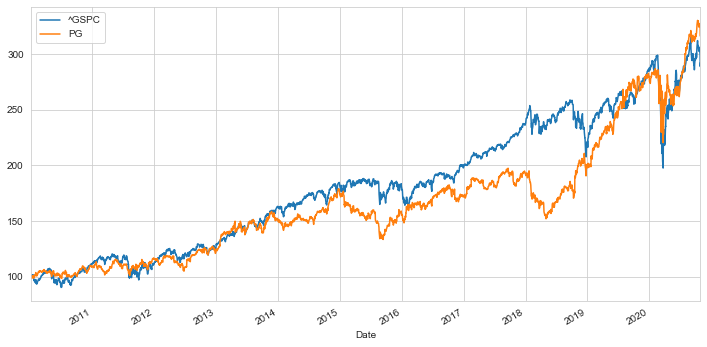

In [112]:
# Normalise the data

(df_eff / df_eff.iloc[0] * 100).plot(figsize=(12,6));

In [113]:
df_eff_returns = np.log(df_eff / df_eff.shift(1))

In [114]:
df_eff_returns.mean() * 250

^GSPC    0.098360
PG       0.105553
dtype: float64

In [115]:
df_eff_returns.cov() * 250

,^GSPC,PG
^GSPC,0.030781,0.018019
PG,0.018019,0.029275


In [116]:
df_eff_returns.corr()

,^GSPC,PG
^GSPC,1.000000,0.600249
PG,0.600249,1.000000


2. Create a variable that will carry the number of assets in our portfolio:

In [117]:
num_assets = len(tickers_eff)
num_assets

2

3. Create 2 random weights:

In [118]:
arr_eff = np.random.random(2)
arr_eff

array([0.17317553, 0.9038592 ])

In [119]:
arr_eff[0] + arr_eff[1]

1.0770347380537328

Remember that the Weights of stock must always be equal to 1, as you can see it does not add up to 1. We can fix this as follows:

In [120]:
weight_eff = np.random.random(num_assets)
weight_eff /= np.sum(weight_eff)
weight_eff

array([0.72337995, 0.27662005])

In [121]:
weight_eff[0] + weight_eff[1]

1.0

Expected portfolio Return

In [122]:
np.sum(weight_eff * df_eff_returns.mean()) * 250

0.10034965547356231

Expected portfolio Variance

In [123]:
eff_var = np.dot(weight_eff.T, np.dot(df_eff_returns.cov() * 250, weight_eff))
eff_var

0.025558409936120793

Expected portfolio Volatality/Risk/Standard deviation

In [124]:
np.sqrt(eff_var)

0.1598699782201799

Create a graph that visualises the hypothetical portfolio of Returns vs Volatilities:

In [125]:
portf_returns = []
portf_volatilities = []

for i in range(1000):
    weight_eff = np.random.random(num_assets)
    weight_eff /= np.sum(weight_eff)
    
    portf_returns.append(np.sum(weight_eff * df_eff_returns.mean()) * 250)
    portf_volatilities.append(np.sqrt(np.dot(weight_eff.T, np.dot(df_eff_returns.cov() * 250, weight_eff))))
    
portf_returns = np.array(portf_returns)
portf_volatilities = np.array(portf_volatilities)

In [126]:
df_portfolios = pd.DataFrame({'Returns':portf_returns, 'Volatilities':portf_volatilities})

In [127]:
df_portfolios.head()

,Returns,Volatilities
0,0.100132,0.161093
1,0.101961,0.154992
2,0.101259,0.156189
3,0.101091,0.156693
4,0.101288,0.156111


In [128]:
df_portfolios.tail()

,Returns,Volatilities
995,0.104024,0.159923
996,0.102106,0.154928
997,0.104164,0.160697
998,0.104468,0.162561
999,0.101972,0.154985


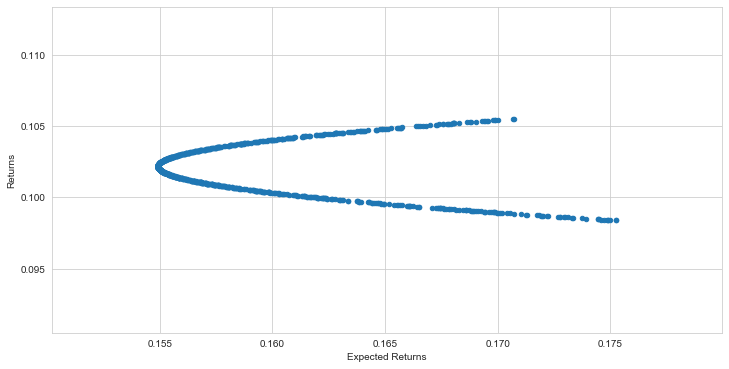

In [129]:
df_portfolios.plot(x='Volatilities', y='Returns', kind='scatter', figsize=(12,6))
plt.xlabel('Expected Volatility')
plt.xlabel('Expected Returns');

# Calculate the Beta of a Stock

In [150]:
tickers_beta = ['^GSPC', 'PG']

df_beta = pd.DataFrame()

for t in tickers_beta:
    df_beta[t] = wb.DataReader(t, data_source='yahoo', start='2016-10-29', end='2020-10-29')['Adj Close']

In [151]:
df_beta_returns = np.log(df_beta / df_beta.shift(1))

In [152]:
cov_beta = df_beta_returns.cov() * 250
cov_beta

,^GSPC,PG
^GSPC,0.041732,0.026584
PG,0.026584,0.044751


In [153]:
cov_with_market = cov_beta.iloc[0,1]
cov_with_market

0.026584478751356517

In [154]:
market_var = df_beta_returns['^GSPC'].var() * 250
market_var

0.041732417627684044

In [155]:
PG_beta = (cov_with_market / market_var)
PG_beta

0.6370222542228458

# Calculating expected return of a stock (CAPM)

In [156]:
PG_exp_return = 0.025 + PG_beta * 0.05
PG_exp_return

0.05685111271114229